<a href="https://colab.research.google.com/github/SEUNGEUN-1025/Pytorch_study/blob/main/Week3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.1 Multiple Linear Regression Prediction**

<h2>Preparation</h2>


In [1]:
# Import the libraries and set the random seed

from torch import nn
import torch
torch.manual_seed(1) # same results everytime we run the code, weight&bias initialized randomly

<h2 id="Prediction">Prediction</h2>


In [2]:
# Set the weight and bias

w = torch.tensor([[2.0], [3.0]], requires_grad=True) #shape:(2,1)
b = torch.tensor([[1.0]], requires_grad=True)

print(w.shape)
print(b.shape)

torch.Size([2, 1])
torch.Size([1, 1])


In [3]:
# Define Prediction Function
# mm: matrix multiplication
def forward(x):
    yhat = torch.mm(x, w) + b #shape:(1,1)
    return yhat

# Calculate yhat
x = torch.tensor([[1.0, 2.0]]) #shape:(1,2)
yhat = forward(x)
print(x.shape)
print("The result: ", yhat)    
print(yhat.shape)

torch.Size([1, 2])
The result:  tensor([[9.]], grad_fn=<AddBackward0>)
torch.Size([1, 1])


# Each row of the following tensor represents a sample:


In [4]:
# Sample tensor X
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]]) #shape:(3,2)

# Make the prediction of X 
yhat = forward(X)
print(X.shape)
print("The result: ", yhat)
print(yhat.shape)

torch.Size([3, 2])
The result:  tensor([[ 6.],
        [ 9.],
        [12.]], grad_fn=<AddBackward0>)
torch.Size([3, 1])


<h2 id="Linear">Class Linear</h2>


In [5]:
# Make a linear regression model using build-in function

model = nn.Linear(2, 1) # in_features: the number of columns.(number of weights)/out_features: size of each output sample
print(list(model.parameters()))


# Make a prediction of x
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
print(X)

yhat = model(X)
print("The result: ", yhat)

[Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True), Parameter containing:
tensor([-0.1371], requires_grad=True)]
tensor([[1., 1.],
        [1., 2.],
        [1., 3.]])
The result:  tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<AddmmBackward>)


<h2 id="Cust">Build Custom Modules </h2>


In [6]:
class linear_regression(nn.Module):

  # constructor
  def __init__(self, input_size, output_size): 
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

   # prediction function
  def forward(self, x):
    yhat = self.linear(x)
    return yhat

In [7]:
model = linear_regression(2, 1)

In [8]:
# Print model parameters 순서대로 weight, bias

print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.3319, -0.6657]], requires_grad=True), Parameter containing:
tensor([0.4241], requires_grad=True)]


* state_dict(): 학습 가능한 매개변수를 갖는 계층(합성곱 계층, 선형 계층 등) 및 등록된 버퍼들(batchnorm의 running_mean)만 모델의 state_dict 항목을 가진다.

In [9]:
# Print model parameters 위에와 같다는거 보여줌

print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[ 0.3319, -0.6657]])), ('linear.bias', tensor([0.4241]))])


In [10]:
# Make a prediction of x

yhat = model(x)
print("The result: ", yhat)

The result:  tensor([[-0.5754]], grad_fn=<AddmmBackward>)


In [11]:
# Make a prediction of X

yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[ 0.0903],
        [-0.5754],
        [-1.2411]], grad_fn=<AddmmBackward>)


<h3>Practice</h3>


Build a model or object of type <code>linear_regression</code>. Using the <code>linear_regression</code> object will predict the following tensor: 


In [12]:
# Practice: Build a model to predict the follow tensor.

X = torch.tensor([[11.0, 12.0, 13, 14], [11, 12, 13, 14]]) # input_size=4
print(X)
print(X.shape)

tensor([[11., 12., 13., 14.],
        [11., 12., 13., 14.]])
torch.Size([2, 4])


Double-click <b>here</b> for the solution.

<!-- Your answer is below:
model = linear_regression(4, 1)
yhat = model(X)
print("The result: ", yhat)
-->


In [13]:
model = linear_regression(4,10) #여기서 input은 X와 맞춰줘야 하고, y는 내가 보고싶은 결과 개수만큼 만들 수 있음.
yhat = model(X)
print("shape: ",yhat.shape)
print("value: ",yhat)

shape:  torch.Size([2, 10])
value:  tensor([[ 1.7021,  1.6146, -0.1714, -0.0281, -5.7384,  4.2869,  5.4116, -3.7032,
          3.4798,  4.7702],
        [ 1.7021,  1.6146, -0.1714, -0.0281, -5.7384,  4.2869,  5.4116, -3.7032,
          3.4798,  4.7702]], grad_fn=<AddmmBackward>)


# **4.2 Multiple Linear Regression Training**

<h2>Preparation</h2>


In [14]:
# Import the libraries we need for this lab
# we update weights given by the following equation in Multiple Linear Regression Training
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

In [15]:
# The function for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

<h2 id=" #Makeup_Data" > Make Some Data </h2>


In [16]:
class Data2D(Dataset):

  def __init__(self):
    self.x = torch.zeros(20,2) #input,output size
    self.x[:, 0] = torch.arange(-1, 1, 0.1)
    self.x[:, 1] = torch.arange(-1, 1, 0.1)
    self.w = torch.tensor([[1.0], [1.0]]) #shape:(2,1) 
    self.b = 1
    self.f = torch.mm(self.x, self.w) + self.b
    self.y = self.f + 0.1 *torch.randn((self.x.shape[0],1))
    self.len = self.x.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len

data_set = Data2D()

<h2 id="Model_Cost">Create the Model, Optimizer, and Total Loss Function (Cost)</h2>


In [17]:
# Create a customized linear

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [18]:
# Create the linear regression model and print the parameters

model = linear_regression(2,1) # 2 input features, 1 output
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[0.1421, 0.1698]], requires_grad=True), Parameter containing:
tensor([-0.4734], requires_grad=True)]


In [19]:
optimizer = optim.SGD(model.parameters(), lr=0.1) # Create the optimizer
criterion = nn.MSELoss() # Create loss function
train_loader = DataLoader(dataset=data_set, batch_size=2) # train_data: minibatch, batch_size=2

<h2 id="BGD">Train the Model via Mini-Batch Gradient Descent</h2>


Gradient descent는, 대표적인 parameter 최적화방법으로, 매 iteration(혹은 시도)마다 각 parameter들의 gradient를 구해서 loss func를 최소화하는 방향으로 업데이트 해주는 최적화방식이다.

Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문"에 우리는 항상 backpropagation을 하기전에 gradients를 zero로 만들어주고 시작을 해야합니다. 이렇게 gradients을 더해주는 방식은 RNN을 학습시킬때 매우 편리한 방식입니다.

backward: 모델의 학습 가능한 모든 parameter에 대해 손실의 변화도를 계산합니다.
내부적으로 각 Module의 parameter는 requires_grad=True일 때 텐서에 저장되므로,
아래 호출은 모델의 모든 학습 가능한 parameter의 변화도를 계산하게 됩니다.

Before Training: 


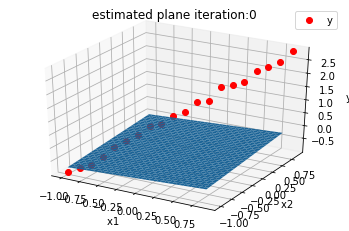

After Training: 


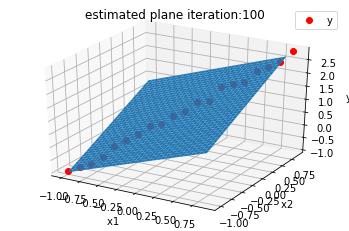

In [20]:
# Train the model

print("Before Training: ")
Plot_2D_Plane(model, data_set)

epochs = 100; LOSS = []

def train_model(epochs):
  for epoch in range(epochs):
    for x,y in train_loader:
      yhat = model(x)
      loss = criterion(yhat,y)
      LOSS.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()


train_model(epochs)

print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)


### **cf) backward in numpy** 

In [21]:
# import numpy as np

# # N은 배치 크기이며, D_in은 입력의 차원
# # H는 은닉 계층의 차원이며, D_out은 출력 차원입니다:
# N, D_in, H, D_out = 64, 1000, 100, 10

# # 데이터 생성
# x = np.random.randn(N, D_in)
# y = np.random.randn(N, D_out)

# # 무작위로 가중치를 초기화
# w1 = np.random.randn(D_in, H)
# w2 = np.random.randn(H, D_out)

# learning_rate = 1e-6
# for t in range(100):
#     # 순전파 단계: 예측값 y를 계산합니다. forward propagation
#     h = x.dot(w1)
#     h_relu = np.maximum(h, 0)
#     y_pred = h_relu.dot(w2)

#     # 손실(loss)을 계산하고 출력합니다.
#     loss = np.square(y_pred - y).sum()
#     print(t, loss)

#     # 손실에 따른 w1, w2의 변화도를 계산하고 backward
#     grad_y_pred = 2.0 * (y_pred - y)
#     grad_w2 = h_relu.T.dot(grad_y_pred)
#     grad_h_relu = grad_y_pred.dot(w2.T)
#     grad_h = grad_h_relu.copy()
#     grad_h[h < 0] = 0
#     grad_w1 = x.T.dot(grad_h)

#     # weight update
#     w1 -= learning_rate * grad_w1
#     w2 -= learning_rate * grad_w2

Text(0, 0.5, 'Cost/total loss ')

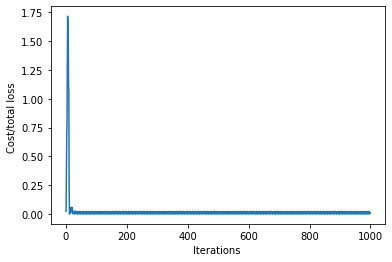

In [22]:
# Plot out the Loss and iteration diagram

plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

<h3>Practice</h3>


1. Create a new <code>model1</code>. Train the model with a batch size 30 and learning rate 0.1, store the loss or total cost in a list <code>LOSS1</code>, and plot the results.


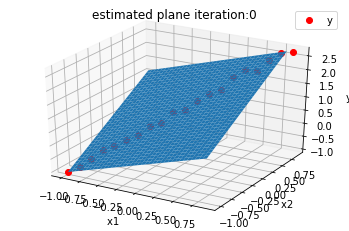

Text(0, 0.5, 'Cost/total loss ')

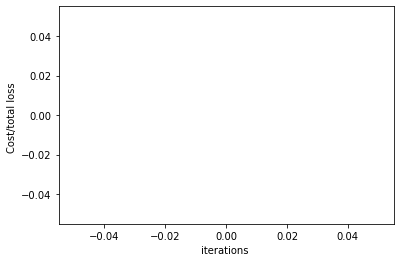

In [23]:
data_set = Data2D()
train_loader = DataLoader(dataset=data_set, batch_size=30)
model1 = linear_regression(2,1)
optimizer = optim.SGD(model1.parameters(), lr=0.1)
LOSS1=[]
epochs=100

def train_model(epochs):
  for epoch in range(epochs):
    for x,y in train_loader:
      yhat = model1(x)
      loss = criterion(yhat,y)
      LOSS.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

train_model(epochs)
Plot_2D_Plane(model1, data_set)
plt.plot(LOSS1)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")

2. Use the following validation data to calculate the total loss or cost for both models:


In [24]:
torch.manual_seed(2)

validation_data = Data2D() # seed가 다르니까 다른 데이터.
Y = validation_data.y
X = validation_data.x

print("total loss or cost for model: ",criterion(model(X),Y))
print("total loss or cost for model: ",criterion(model1(X),Y))

total loss or cost for model:  tensor(0.0083, grad_fn=<MseLossBackward>)
total loss or cost for model:  tensor(0.0079, grad_fn=<MseLossBackward>)


# **4.3.linear regression with multiple outputs**

<a id="ref1"></a>

<h2>Class Linear  </h2>


In [25]:
from torch import nn
import torch
torch.manual_seed(1)

In [26]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

In [27]:
model = linear_regression(2,2) # number of rows of x(or w), number of columns of x(or bias)
x = torch.tensor([[1.0,2.0]]) # for 1 tensor, 2 outputs
yhat=model(x)
print(x.shape)
print(yhat)

torch.Size([1, 2])
tensor([[-0.9256,  0.9508]], grad_fn=<AddmmBackward>)


In [28]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3643, -0.3121],
         [-0.1371,  0.3319]], requires_grad=True), Parameter containing:
 tensor([-0.6657,  0.4241], requires_grad=True)]

In [29]:
X=torch.tensor([[1.0,1.0],[1.0,2.0],[1.0,3.0]])
Yhat=model(X)
print(X.shape)
print(Yhat)
print(Yhat.shape)

torch.Size([3, 2])
tensor([[-0.6135,  0.6189],
        [-0.9256,  0.9508],
        [-1.2377,  1.2827]], grad_fn=<AddmmBackward>)
torch.Size([3, 2])


# **4.4 training multiple output linear regression**

In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [31]:
torch.manual_seed(1)

<a id="ref0"></a>

<h2>Make Some Data </h2>
Create a dataset class with two-dimensional features and two targets: 


In [32]:
from torch.utils.data import Dataset, DataLoader

class Data2D(Dataset):

  def __init__(self):
    self.x=torch.zeros(20,2)
    self.x[:,0]=torch.arange(-1,1,0.1)
    self.x[:,1]=torch.arange(-1,1,0.1)
    self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
    self.b=torch.tensor([[1.0,-1.0]])
    self.f=torch.mm(self.x,self.w)+self.b           
    self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
    self.len=self.x.shape[0]

    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len  


data_set=Data2D()        

<a id="ref1"></a>

<h2>Create the Model, Optimizer, and Total Loss Function (cost)</h2>


In [33]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)

    def forward(self,x):
        yhat=self.linear(x)
        return yhat

In [34]:
model=linear_regression(2,2)
optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.MSELoss()
train_loader=DataLoader(dataset=data_set,batch_size=5)

<a id="ref2"></a>

<h2>Train the Model via Mini-Batch Gradient Descent </h2>


In [35]:
LOSS=[]
 
epochs=100
   
for epoch in range(epochs):
    for x, y in train_loader:
        yhat = model(x)
        loss = criterion(yhat,y)    
        LOSS.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()     


TypeError: ignored

Plot the cost:


In [ ]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()